<a href="https://colab.research.google.com/github/amansingh202/Machine-Learning/blob/main/Deep-learning/hw2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

- I recommend that you start with "hw2.tex" first.
- When you turn in the assignment, do not clear the output.
- Make sure that your python notebook can run end-to-end with no mistake, in case the figures need to be reproduced.

In [ ]:
#modules to import
import numpy as np
import matplotlib.pyplot as plt

# 1 Conditional Probability

## [2] point(s) --- part b:

- Complete this after you finish "1 Conditional Probability --- part a" from "hw2.tex".

- Generate `y = wx + b + eps` where `eps` is constructed by the pseudo code in "1 Conditional Probability --- part a".

- Your task is to generate `eps` by changing the line with the comment "# YOUR ANSWER HERE".

- Leave all other lines as is.

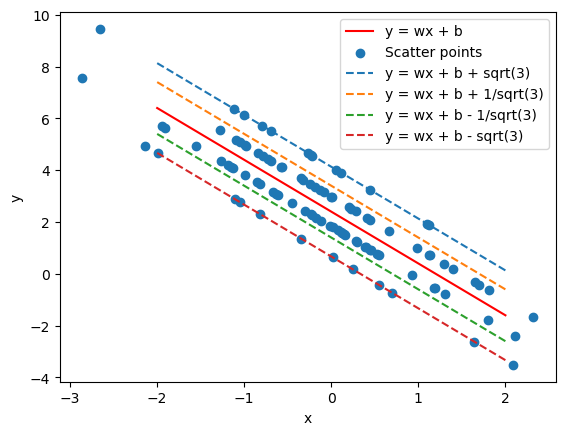

In [ ]:
np.random.seed(1729)
N = 100
n = 3
w_star = -2.0
b_star = 2.4
x = np.random.randn(N)
eps = np.zeros(N)
for i in range(N):
    for t in range(n):
        if np.random.rand() < 0.5:
            eps[i] += 1
        else:
            eps[i] -= 1
eps /= np.sqrt(n)
y = w_star * x + b_star + eps
x_grid = np.linspace(-2, 2)
plt.plot(x_grid, w_star * x_grid + b_star, color='r', label='y = wx + b')
plt.scatter(x, y, label='Scatter points')
plt.plot(x_grid, w_star * x_grid + b_star + np.sqrt(3), linestyle='--', label='y = wx + b + sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star + 1, linestyle='--', label='y = wx + b + 1/sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star - 1, linestyle='--', label='y = wx + b - 1/sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star - np.sqrt(3), linestyle='--', label='y = wx + b - sqrt(3)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## [2] point(s) --- part c:

In the previous parts, you see should scatter points following 4 distinct lines.

- Calculate how many scatter points belong to each of the lines.
- Store the results into `n1,n2,n3,n4` such that `n1 >= n2 >= n3 >= n4`

In [ ]:
# Possible values of y
y1 = w_star * x + b_star + np.sqrt(3)
y2 = w_star * x + b_star + 1/np.sqrt(3)
y3 = w_star * x + b_star - 1/np.sqrt(3)
y4 = w_star * x + b_star - np.sqrt(3)
tolerance = 0.1
n1 = np.sum(np.abs(y - y1) < tolerance)
n2 = np.sum(np.abs(y - y2) < tolerance)
n3 = np.sum(np.abs(y - y3) < tolerance)
n4 = np.sum(np.abs(y - y4) < tolerance)
counts = sorted([n1, n2, n3, n4], reverse=True)
n1, n2, n3, n4 = counts
total = n1+n2+n3+n4 # do not change this line
print(n1/total, n2/total, n3/total, n4/total) # do not change this line

0.41 0.34 0.13 0.12


# 2 The Gaussian distribution

## [1] point(s) --- part c:

- Implement the data generative process from part a.

- Compute the number of elements of `y` that is between 1 ± 0.1. Store that into n1

- Compute the number of elements of `y` that is between -1/2 ± 0.1. Store that into n2

In [ ]:
import numpy as np

N = 10000

np.random.seed(1729)

w = np.array([0,1])
b = 3
x = np.vstack([[1,-2] for _ in range(N)])

eps = np.random.normal(0, 1/np.sqrt(2), size=N)

y = x@w + b + eps

n1 = np.sum((y >= 0.9) & (y <= 1.1))
n2 = np.sum((y >= -0.6) & (y <= -0.4))

print(n1/n2)

8.325757575757576


# 3 Gradient descent for nonlinear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 200

np.random.seed(1729)

w1_star = -4.0
w2_star = 4.8

x = np.concatenate([1.5*(np.random.randn(N//2)-1), 1.5*(np.random.randn(N//2)+1)])
eps = (1/10)*np.random.randn(N)

y = np.sin(w1_star*x) + np.cos(w2_star*x)+eps

plt.scatter(x,y)

x_grid = np.linspace(-6,6,100)
plt.plot(x_grid, np.sin(w1_star*x_grid) + np.cos(w2_star*x_grid), color ='r')

## [3] points --- part b

In [ ]:
def J(w1,w2):
    predictions = # YOUR CODE HERE
    mse = (1/N)*np.sum((y - predictions) ** 2)
    return mse

def dJdw1(w1, w2):
    N = len(y)
    grad_w1 = # YOUR CODE HERE
    return grad_w1


def dJdw2(w1, w2):
    N = len(y)
    grad_w2 = # YOUR CODE HERE
    return grad_w2


## [3] points --- part c

For this part, only your response in `hw2.tex` will be graded. You can use as many code blocks below as you like.

In [ ]:
# good initialization
w1_0 = -2.5
w2_0 = 3.5



# bad initialization
w1_0 = -2.4
w2_0 = 3.5



In [ ]:
# plot_J_surface() # you might find plotting the J function helpful

def plot_J_surface(alpha=1.0):
    w1_values = np.linspace(-6, 1, 100)
    w2_values = np.linspace(-1, 6, 100)
    W, B = np.meshgrid(w1_values, w2_values)

    Z = np.array([[J(w1,w2) for w1 in w1_values] for w2 in w2_values])

    fig = go.Figure(data=[go.Surface(z=Z, x=w1_values, y=w2_values,opacity=alpha)])

    fig.update_layout(title='J(w1, w2) surface plot',
                      scene=dict(xaxis_title='w1',
                                 yaxis_title='w2',
                                 zaxis_title='MSE') ,
                      width=800, height=600)

    return fig


def plot_line_segment(fig, w1, b1, w2, b2, color='blue'):
    mse1 = J(w1, b1)
    mse2 = J(w2, b2)

    fig.add_trace(go.Scatter3d(x=[w1, w2], y=[b1, b2], z=[mse1, mse2],
                               mode='lines',
                               line=dict(color=color, width=2),
                               name=f'Line Segment ({w1}, {b1}) -> ({w2}, {b2})'))


def plot_point(fig, w, b, color='red'):
    mse = J(w, b)
    fig.add_trace(go.Scatter3d(x=[w], y=[b], z=[mse],
                               mode='markers',
                               marker=dict(size=5, color=color),
                               name=f'Point (w={w}, b={b})'))

## [10 bonus] points --- part d